# Предобработка признаков

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Выясним, сколько пропущенных значений у каждого из признаков

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Пропущенных значений у данного датафрейма нет

# Перекодирование признаков

Перекодируем порядковый признак. Каждому из значений порядкового признака поставим в соответствие некое число.

In [5]:
regions = df['region'].unique()
regions

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [6]:
region_codding = {
    regions[0] : 1,
    regions[1] : 2,
    regions[2] : 3,
    regions[3] : 4
}

In [7]:
df['region'] = df['region'].map(region_codding)

In [8]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,1,16884.92400
1,18,male,33.770,1,no,2,1725.55230
2,28,male,33.000,3,no,2,4449.46200
3,33,male,22.705,0,no,3,21984.47061
4,32,male,28.880,0,no,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,3,10600.54830
1334,18,female,31.920,0,no,4,2205.98080
1335,18,female,36.850,0,no,2,1629.83350
1336,21,female,25.800,0,no,1,2007.94500


Перекодируем бинарный признак. Присвоим каждому значению этого признака 0 или 1 в зависимости от пола.

In [9]:
gender = df['sex'].unique()
gender

array(['female', 'male'], dtype=object)

In [10]:
sex_codding = {
    gender[0] : 0,
    gender[1] : 1
}

In [11]:
df['sex'] = df['sex'].map(sex_codding)
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,1,16884.92400
1,18,1,33.770,1,no,2,1725.55230
2,28,1,33.000,3,no,2,4449.46200
3,33,1,22.705,0,no,3,21984.47061
4,32,1,28.880,0,no,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,3,10600.54830
1334,18,0,31.920,0,no,4,2205.98080
1335,18,0,36.850,0,no,2,1629.83350
1336,21,0,25.800,0,no,1,2007.94500


Перекодируем бинарный признак. Присвоим каждому значению этого признака 0 или 1 в зависимости от того, курит человек или нет.

In [12]:
smokers = df['smoker'].unique()
smokers

array(['yes', 'no'], dtype=object)

In [13]:
smokers_codding = {
    smokers[0] : 1,
    smokers[1] : 0
}

In [14]:
df['smoker'] = df['smoker'].map(smokers_codding)
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,4,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


Сохраним обработанные данные в новый .csv файл

In [15]:
df.to_csv('insurance_preprocessed.csv')

# Визуализация данных

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


Text(0.5, 0, 'Charges')

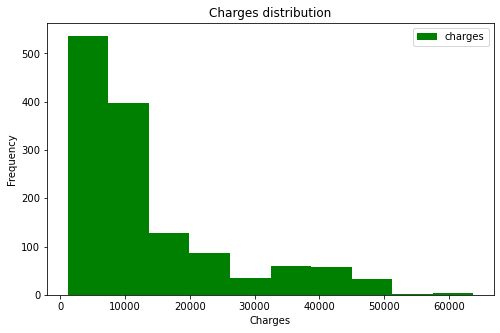

In [19]:
df.plot(y='charges', kind='hist', color='green', title='Charges distribution')
plt.xlabel('Charges')

Построим график зависимости медицинских расходов от возвраста. Выберем нужные нам столбцы, затем посчитаем суммарное количество  медицинских расходов и у получившегося датафрейма вызовем метод plot без параметров.

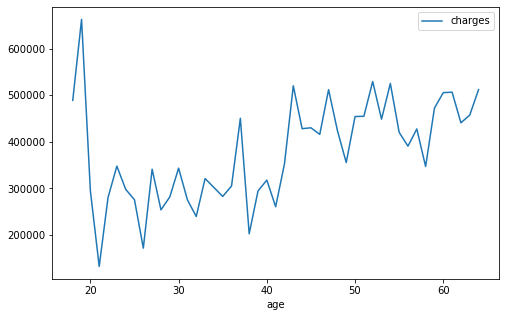

In [20]:
df[['age'] + ['charges']].groupby('age').sum().plot()

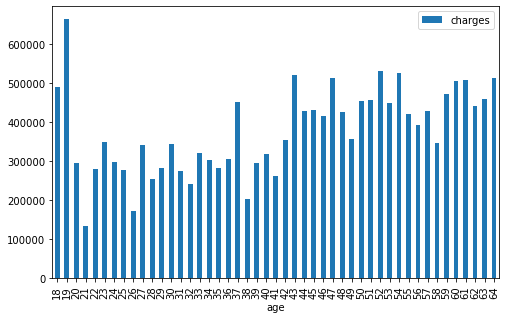

In [21]:
df[['age'] + ['charges']].groupby('age').sum().plot(kind='bar')

Построим график типа pair plot, который поможет посмотреть как связаны между собой различные признаки

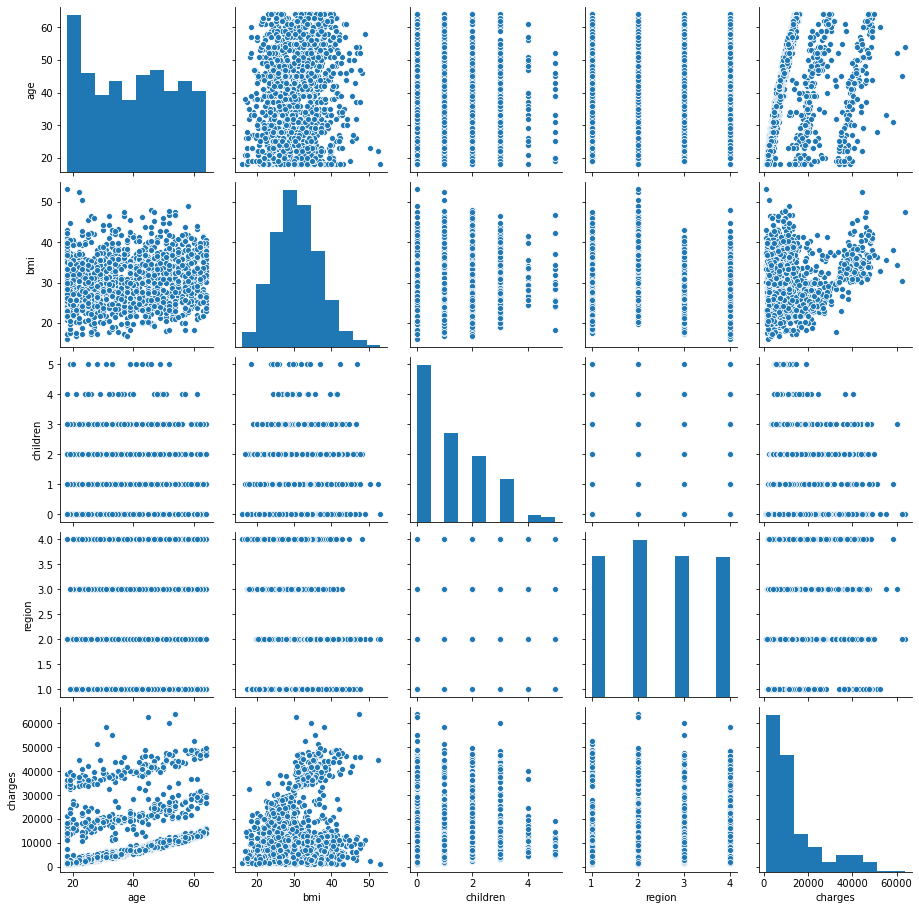

In [22]:
sns.pairplot(df[['age', 'bmi', 'children', 'region', 'charges']])

Построим распределение dist plot и посмотрим на распределение мед. расходов

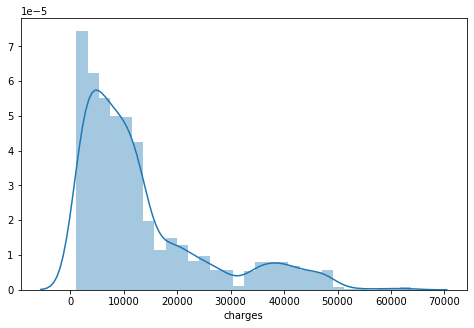

In [23]:
sns.distplot(df['charges'])

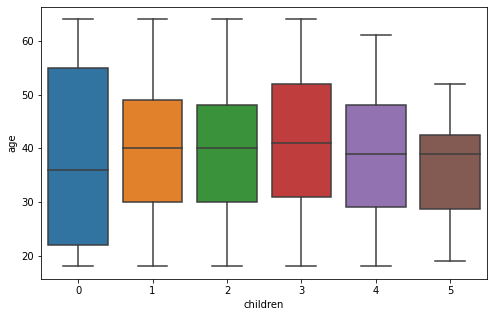

In [24]:
sns.boxplot(x='children', y='age', data=df)

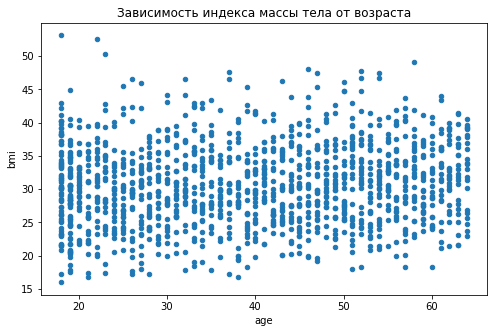

In [25]:
df.plot(x='age', y='bmi', kind='scatter', title='Зависимость индекса массы тела от возраста')